In [10]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [11]:
original_path = os.path.join(os.getcwd(), 'eda', 'original')
json_path = os.path.join(os.getcwd(), 'eda', 'json')
mtcnn_path = os.path.join(os.getcwd(), 'eda', 'mtcnn')

In [12]:
def show_images(path):
    fig, ax = plt.subplots(2,2,figsize=(20, 10))

    for i, image in enumerate(os.listdir(path)):
        image_path = os.path.join(path, image)
        img=Image.open(image_path)
        ax[i%2][i//2].set_title(img.size)
        ax[i%2][i//2].imshow(img)

In [13]:
def show_distribution(path):
    sizes = []
    for r, _, f in os.walk(path):
        for file in f:
            if file.endswith(".jpg"):
                with Image.open(os.path.join(r, file)) as img:
                    w, h = img.size
                    sizes.append([w, h])

    json_data = np.array(sizes)
    json_df = pd.DataFrame(data = json_data, columns = ['x', 'y'])

    # Distribution by X value
    fig = plt.figure(figsize=(15, 10))
    s1 = fig.add_subplot(2,1,1)
    sns.distplot(json_df['x'], axlabel="image width in px")
    plt.axvline(json_df['x'].median(), color='k', label="median " + str(json_df['x'].median()), linestyle='--')

    # Distribution by Y value
    s2 = fig.add_subplot(2,1,2)
    sns.distplot(json_df['y'], axlabel="image height in px")
    plt.axvline(json_df['y'].median(), color='k', label="median " + str(json_df['y'].median()), linestyle='--')

    s1.legend()
    s2.legend()

    fig.show()

### Original images

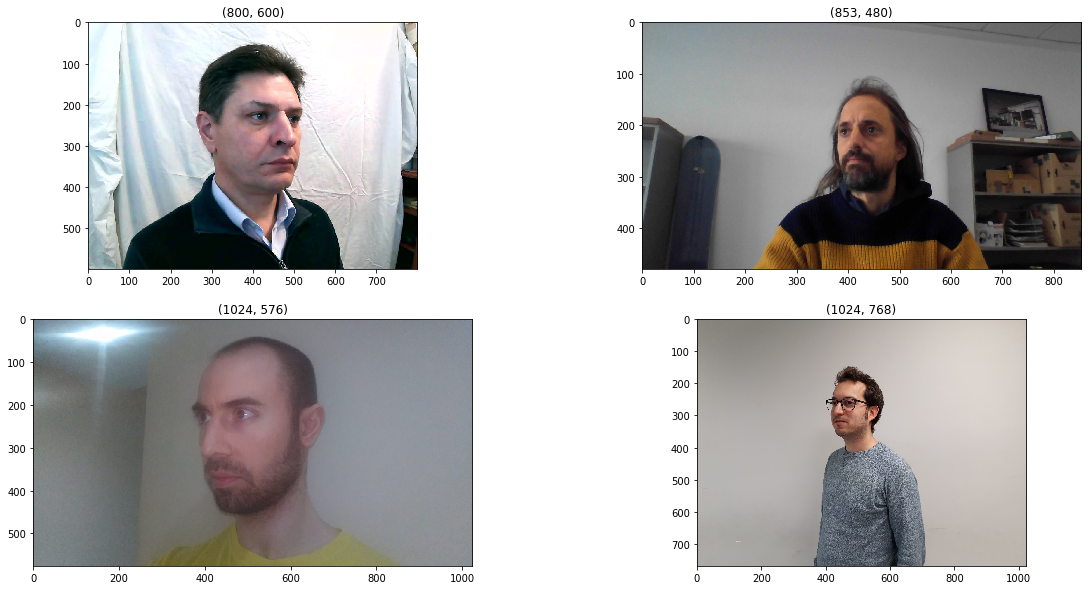

In [14]:
show_images(original_path)

### Json images

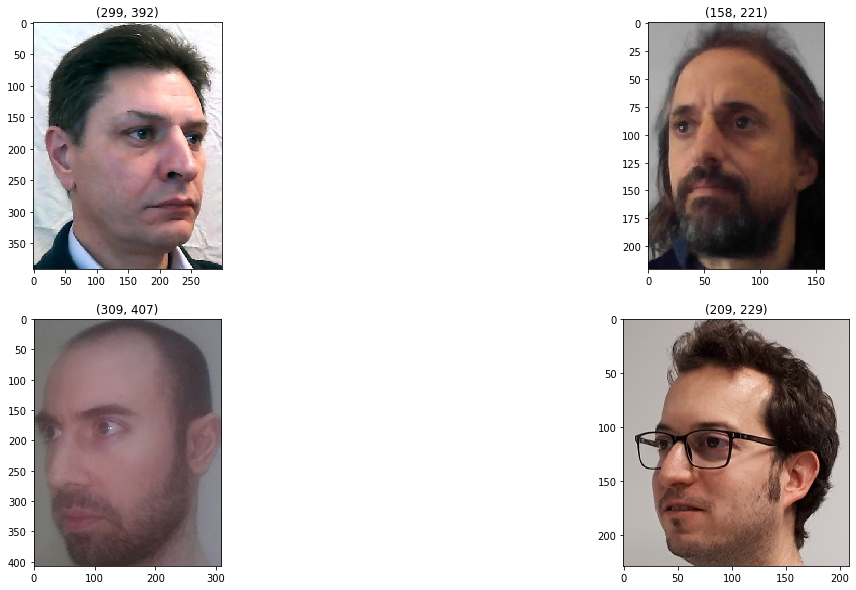

In [15]:
show_images(json_path)

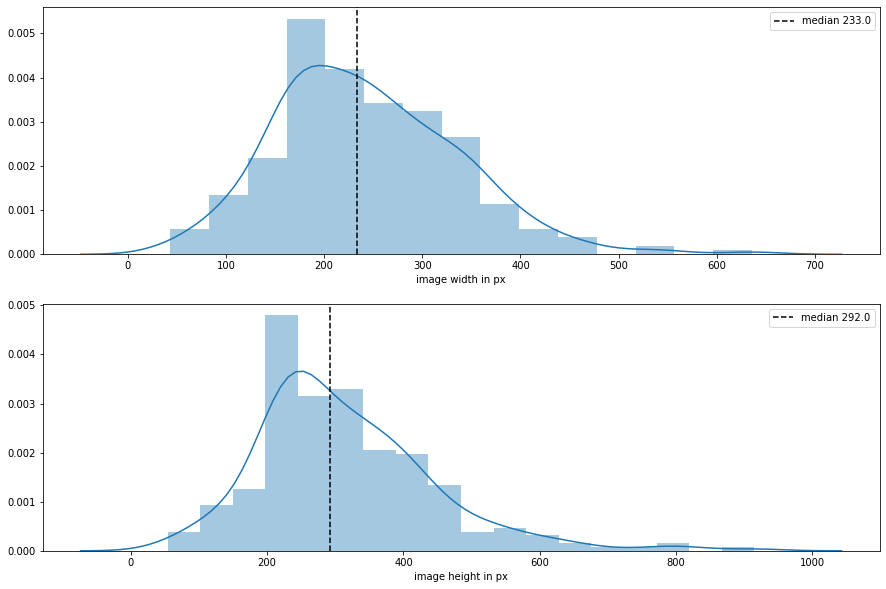

In [16]:
json_train_path = os.path.join('dataset_Pere', 'dataset_cares', 'train')
show_distribution(json_train_path)

### MTCNN images

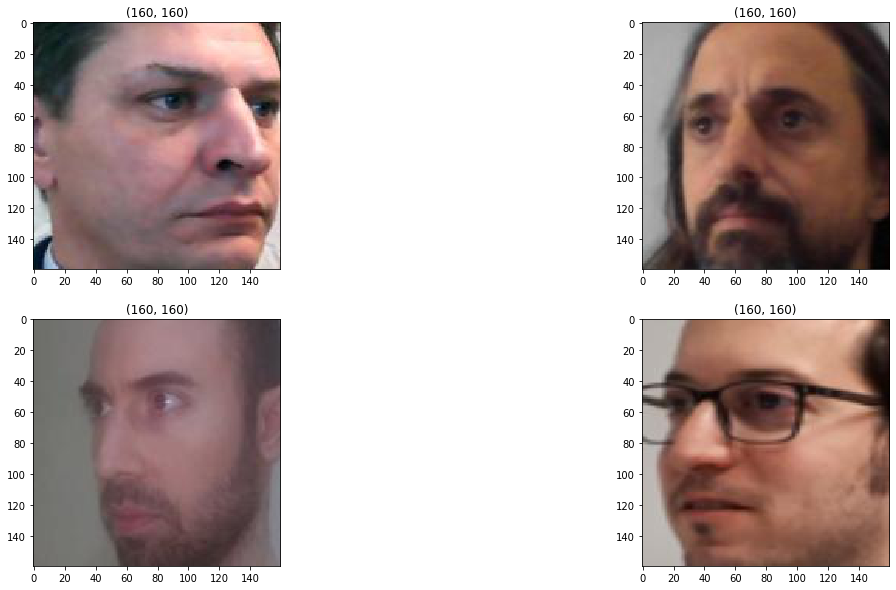

In [17]:
show_images(mtcnn_path)

In [18]:
original_imgs = [os.path.join(original_path, img_path) for img_path in os.listdir(original_path)]
json_imgs = [os.path.join(json_path, img_path) for img_path in os.listdir(json_path)]
mtcnn_imgs = [os.path.join(mtcnn_path, img_path) for img_path in os.listdir(mtcnn_path)]

images_path = zip(original_imgs, json_imgs, mtcnn_imgs)

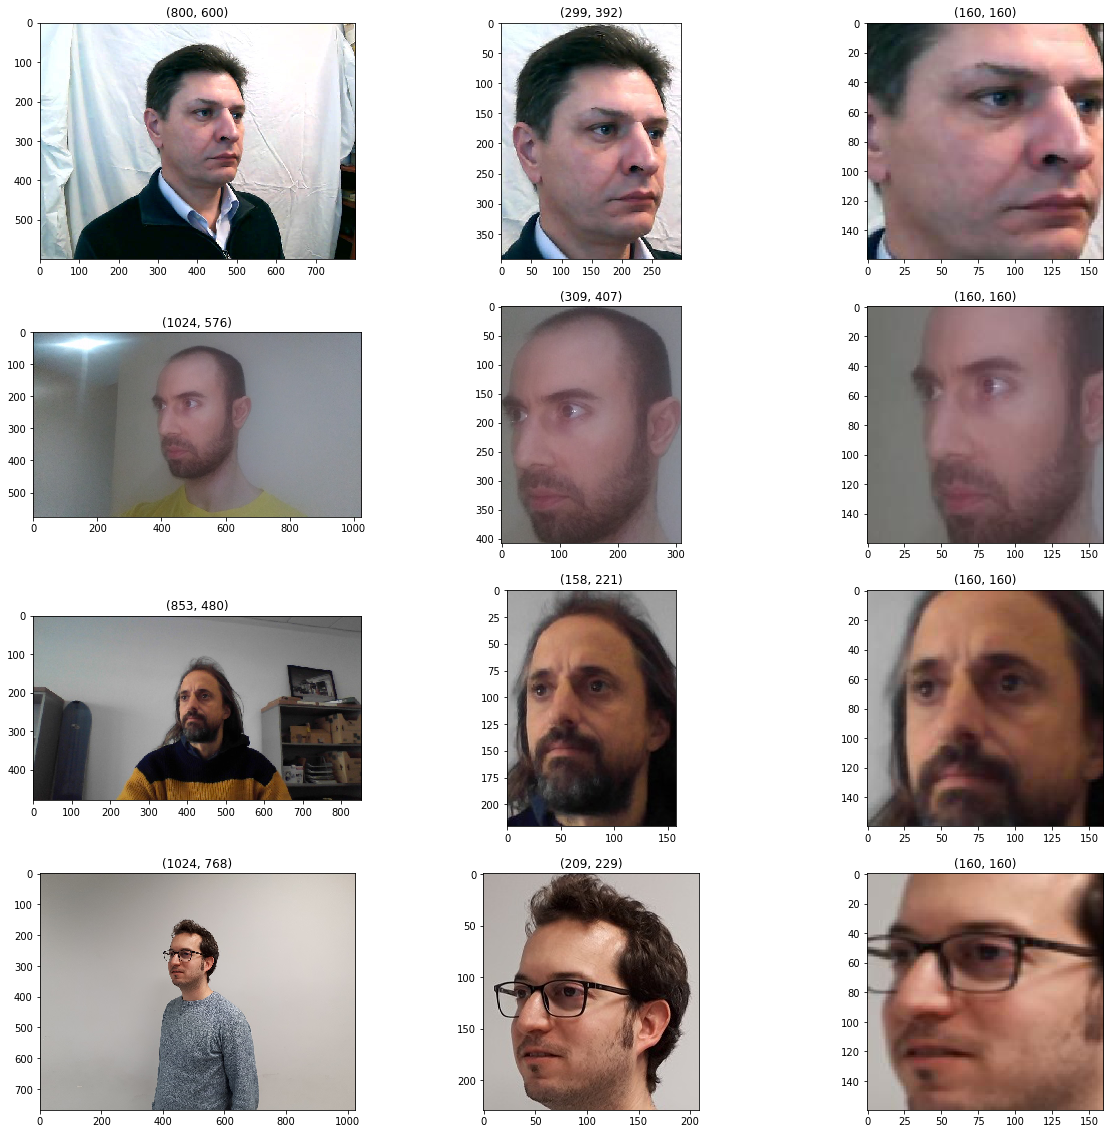

In [19]:
fig, ax = plt.subplots(4,3,figsize=(20, 20))

for c, types in enumerate([original_imgs, json_imgs, mtcnn_imgs]):
    for r, p in enumerate(types):
        img = Image.open(p)
        ax[r][c].set_title(img.size)
        ax[r][c].imshow(img)